<a href="https://colab.research.google.com/github/khoa030602/CuoiKy/blob/main/Cuoiky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.preprocessing import  ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Data/Insect/train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 157 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'Buom': 0,
 'bohung': 1,
 'bongua': 2,
 'borua': 3,
 'chuonchuon': 4,
 'ong': 5,
 'vesau': 6}

In [ ]:
#mô hình CNN
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Normalization, Dropout
from keras.layers import LeakyReLU

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()

# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))

# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
#ham loai bo
model.add(LeakyReLU(alpha = 0.1))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))


# Duỗi thẳng dữ liệu 
model.add(Flatten())

# Tạo lớp thứ nhất với 256 tín hiệu ra
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
# Tạo lớp thứ hai với 3 tín hiệu ra
model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
from keras.utils import to_categorical # one hot encoding cho output
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 500 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size)
history=model.fit(training_set,epochs=20,batch_size=128,verbose=1)

Epoch 1/20
5/5 [==============================] - 34s 6s/step - loss: 24.7171 - accuracy: 0.1783
Epoch 2/20
5/5 [==============================] - 14s 3s/step - loss: 2.6103 - accuracy: 0.2484
Epoch 3/20
5/5 [==============================] - 14s 3s/step - loss: 1.7431 - accuracy: 0.2994
Epoch 4/20
5/5 [==============================] - 14s 2s/step - loss: 1.5125 - accuracy: 0.4777
Epoch 5/20
5/5 [==============================] - 14s 3s/step - loss: 1.1632 - accuracy: 0.5987
Epoch 6/20
5/5 [==============================] - 14s 3s/step - loss: 0.9278 - accuracy: 0.6879
Epoch 7/20
5/5 [==============================] - 13s 2s/step - loss: 0.7331 - accuracy: 0.7325
Epoch 8/20
5/5 [==============================] - 14s 3s/step - loss: 0.5693 - accuracy: 0.7962
Epoch 9/20
5/5 [==============================] - 13s 2s/step - loss: 0.3584 - accuracy: 0.8981
Epoch 10/20
5/5 [==============================] - 13s 2s/step - loss: 0.2827 - accuracy: 0.9236
Epoch 11/20
5/5 [=====================

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.08278464525938034
Train Accuracy 0.9808917045593262


<function matplotlib.pyplot.show(close=None, block=None)>

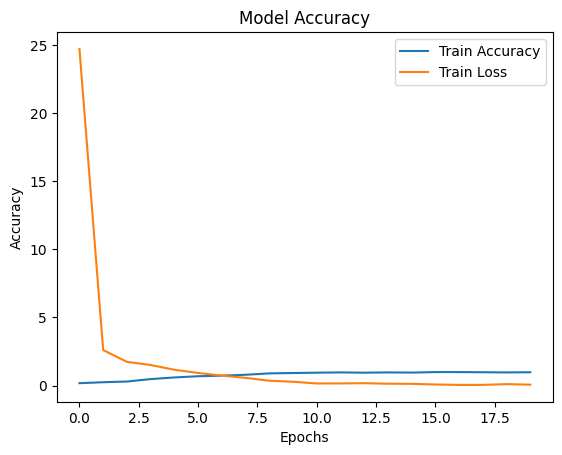

In [ ]:
from matplotlib import pyplot as plt 
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train Accuracy','Train Loss'])
plt.show

In [ ]:
# Lưu lại
model.save("Insect.h5")

In [ ]:
from tensorflow.keras.models import load_model
# Tải mô hình 
model_CNN=load_model('Insect.h5')

In [ ]:
from sklearn import preprocessing
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import os
import numpy as np

1/1 [==============================] - 0s 241ms/step
buom


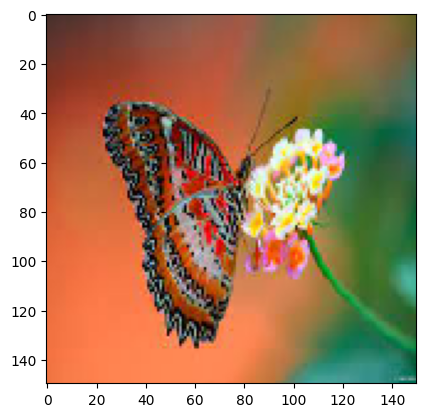

1/1 [==============================] - 0s 170ms/step
buom


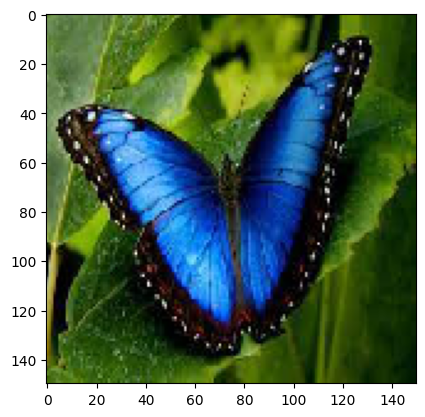

1/1 [==============================] - 0s 121ms/step
buom


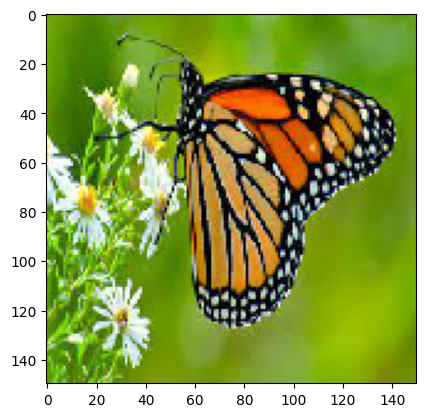

1/1 [==============================] - 0s 187ms/step
buom


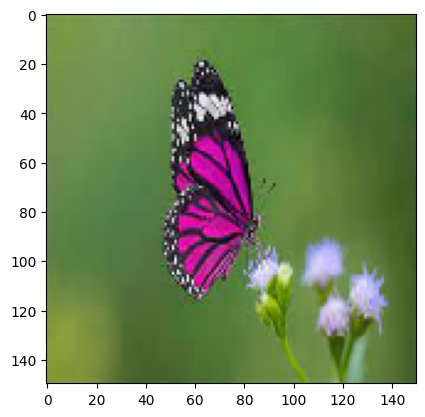

1/1 [==============================] - 0s 119ms/step
buom


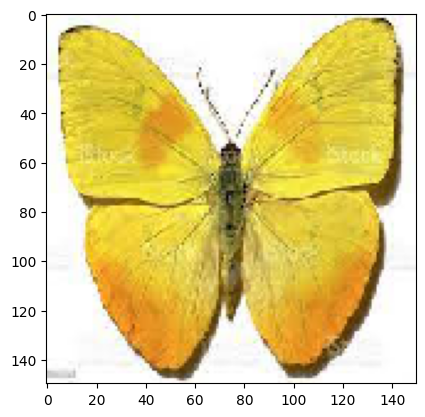

1/1 [==============================] - 0s 100ms/step
bongua


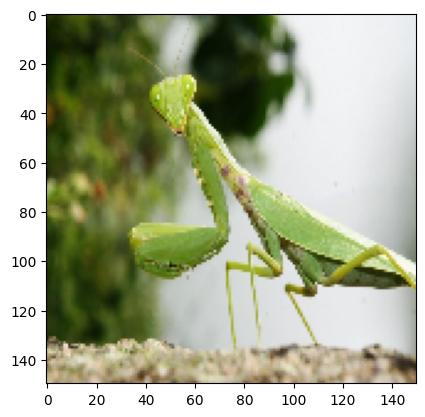

1/1 [==============================] - 0s 135ms/step
bongua


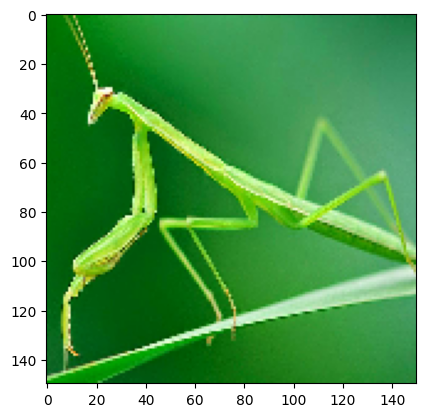

1/1 [==============================] - 0s 148ms/step
bongua


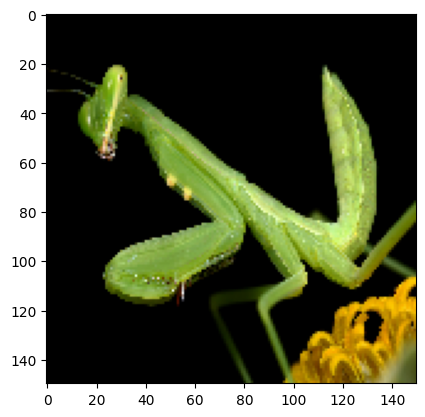

1/1 [==============================] - 0s 92ms/step
bongua


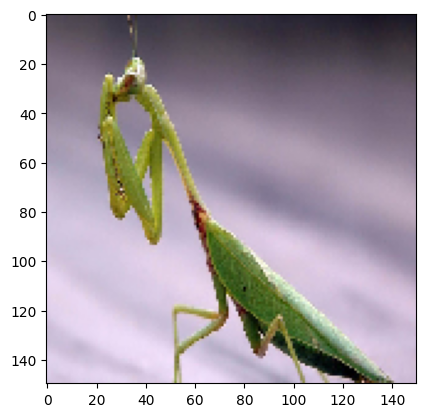

1/1 [==============================] - 0s 77ms/step
bongua


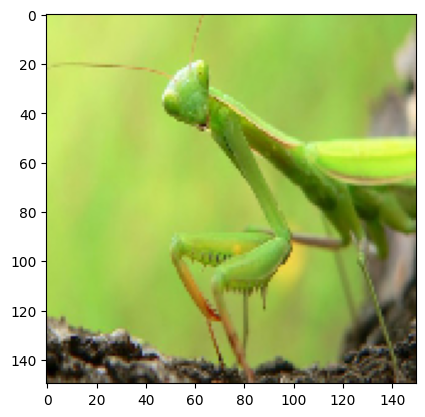

1/1 [==============================] - 0s 88ms/step
borua


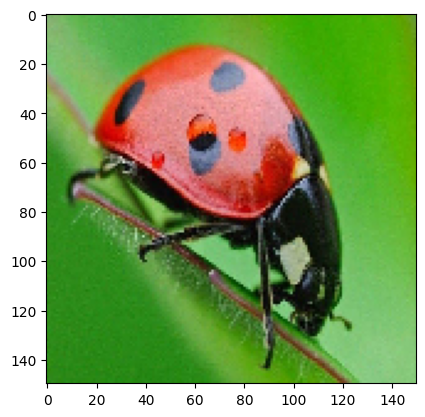

1/1 [==============================] - 0s 120ms/step
borua


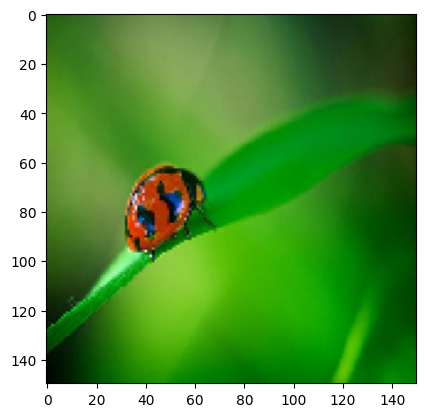

1/1 [==============================] - 0s 88ms/step
borua


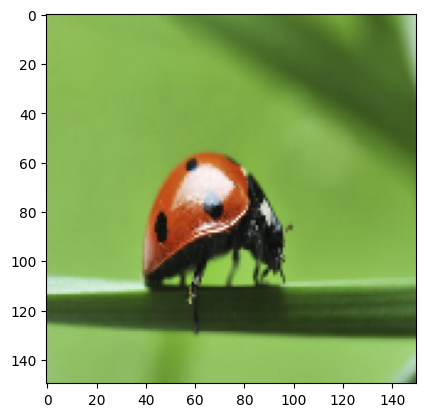

1/1 [==============================] - 0s 95ms/step
borua


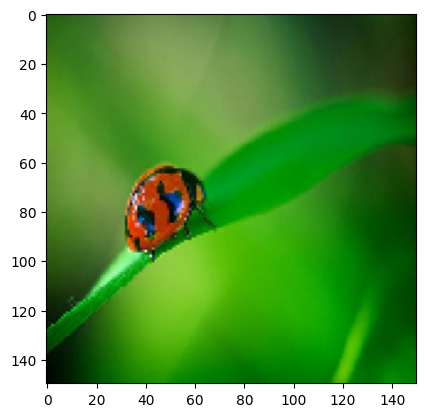

1/1 [==============================] - 0s 162ms/step
vesau


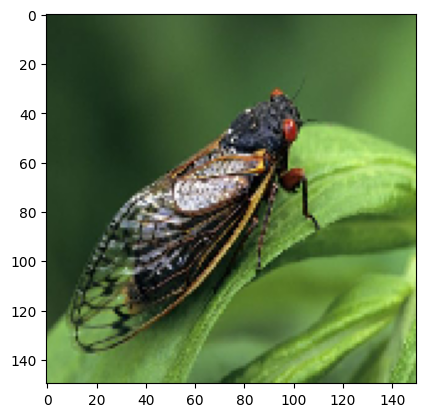

1/1 [==============================] - 0s 108ms/step
vesau


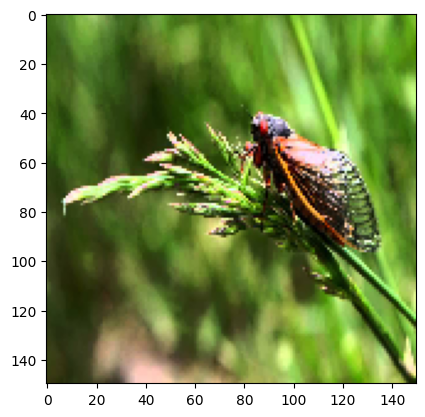

1/1 [==============================] - 0s 67ms/step
vesau


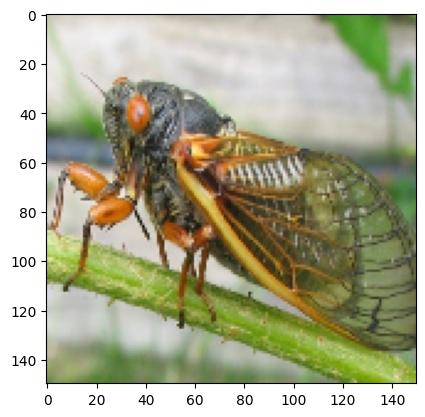

1/1 [==============================] - 0s 69ms/step
vesau


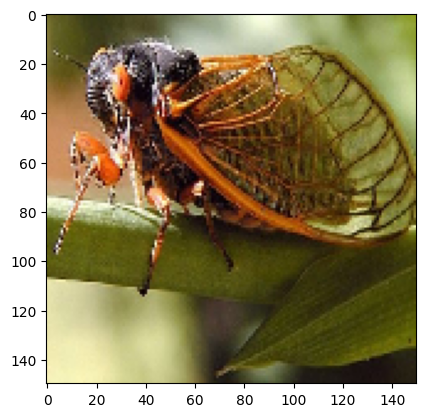

1/1 [==============================] - 0s 43ms/step
ong


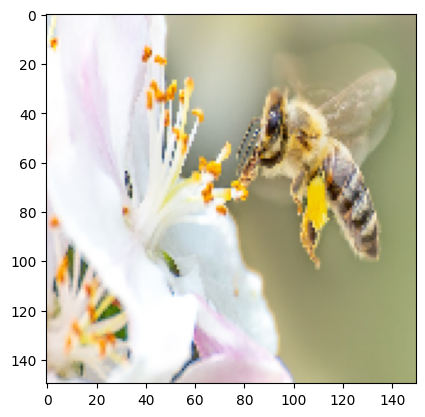

1/1 [==============================] - 0s 48ms/step
ong


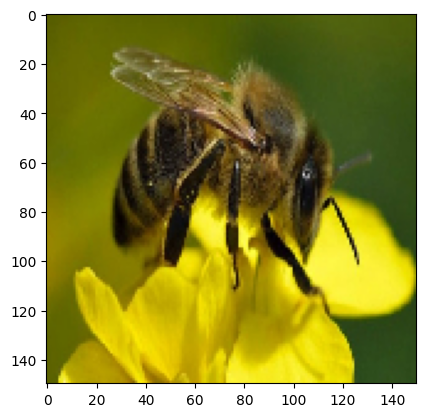

1/1 [==============================] - 0s 42ms/step
ong


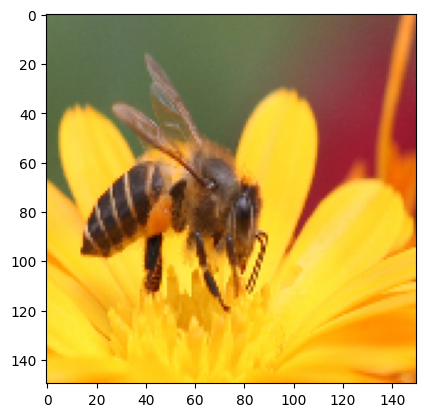

1/1 [==============================] - 0s 44ms/step
ong


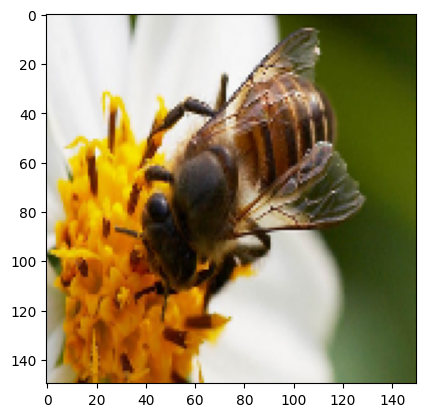

1/1 [==============================] - 0s 42ms/step
ong


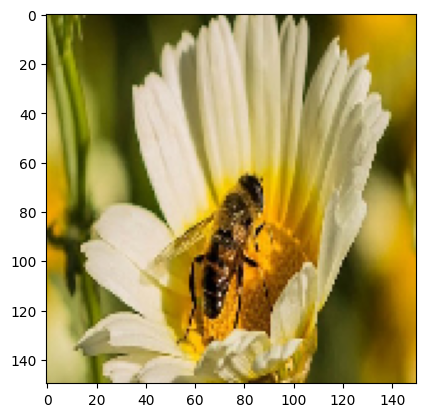

1/1 [==============================] - 0s 47ms/step
ong


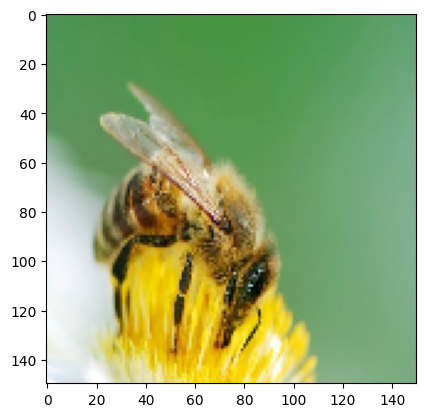

1/1 [==============================] - 0s 42ms/step
bohung


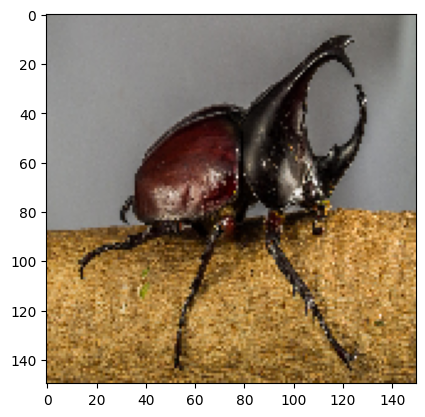

1/1 [==============================] - 0s 42ms/step
bohung


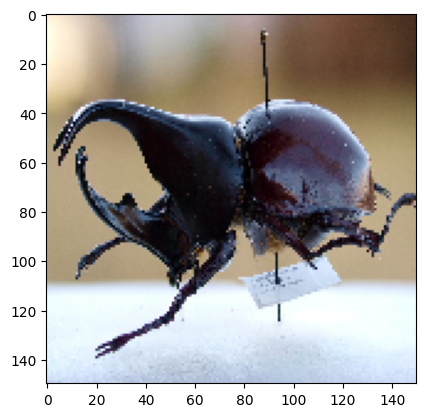

1/1 [==============================] - 0s 41ms/step
bohung


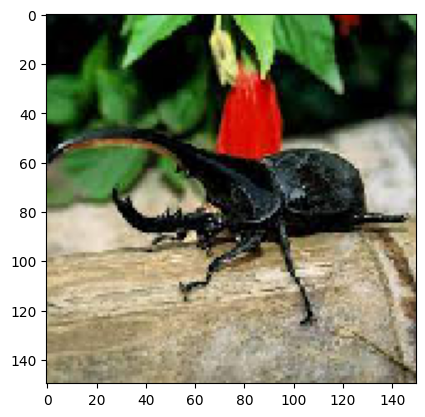

1/1 [==============================] - 0s 43ms/step
bohung


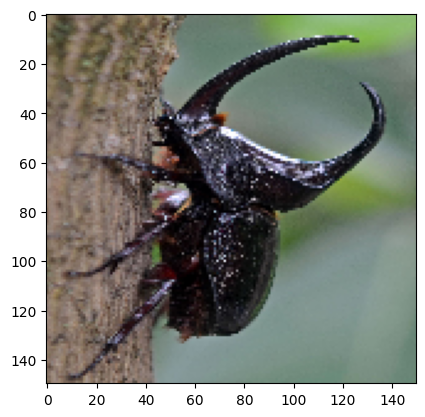

1/1 [==============================] - 0s 42ms/step
chuonchuon


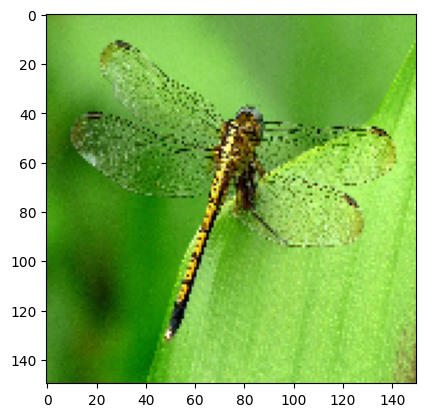

1/1 [==============================] - 0s 49ms/step
chuonchuon


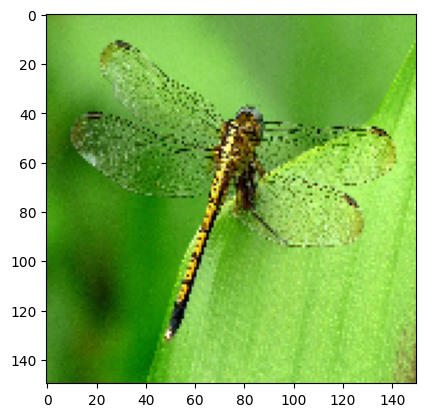

1/1 [==============================] - 0s 45ms/step
chuonchuon


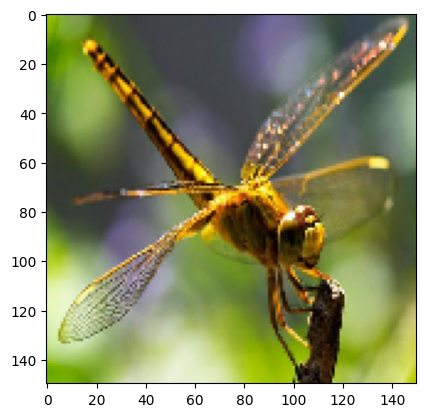

1/1 [==============================] - 0s 43ms/step
chuonchuon


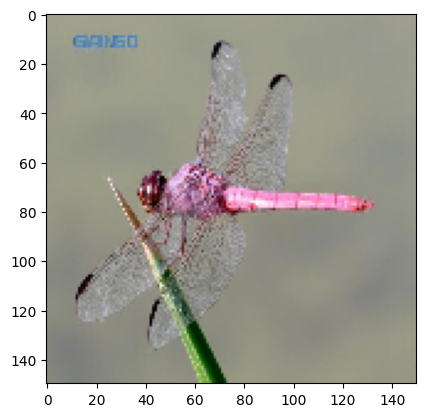

1/1 [==============================] - 0s 58ms/step
chuonchuon


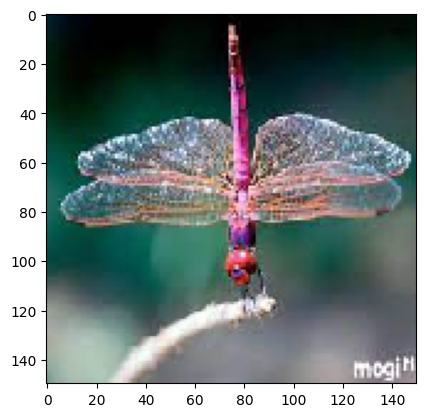

In [ ]:
test='/content/drive/MyDrive/AI/Data/Insect/test'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  
  result = int(np.argmax(model_CNN.predict(img),axis =1))

  class_name=['buom','bohung','bongua','borua','chuonchuon','ong','vesau']
  
  print(class_name[result])
  plt.show()